#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기
어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하는 방식


learning_Rate(학습속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 느리도록 예상
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님

 0 w1 = 0.798303, b = 0.608166 , cost = 14.022336
 1 w1 = 1.719831, b = 4.049615 , cost = 1.010858
 2 w1 = 1.900788, b = 3.967242 , cost = 0.934512
 3 w1 = 1.983761, b = 3.951067 , cost = 0.919946
 4 w1 = 2.020455, b = 3.943650 , cost = 0.917091
 5 w1 = 2.036698, b = 3.940370 , cost = 0.916532
 6 w1 = 2.043889, b = 3.938918 , cost = 0.916422
 7 w1 = 2.047072, b = 3.938276 , cost = 0.916401
 8 w1 = 2.048481, b = 3.937991 , cost = 0.916397
 9 w1 = 2.049105, b = 3.937865 , cost = 0.916396


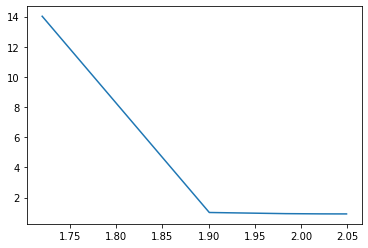

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def MSE(y_pred, y):
    cost = np.sum((y_pred - y)**2) / len(y)
    return cost

n_samples=200
x1 = np.random.randn(n_samples)

y = 2*x1 + 4 + np.random.randn(n_samples)

num_epoch = 10 #반복횟수
lr = 0.7 # learning_rate(학습속도)

w_val = []
cost_val = []
w1 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + b
    # cost = np.abs(y_pred -y).mean( # MAE)
    cost = MSE(y_pred, y)
    print(f"{epoch:2} w1 = {w1:.6f}, b = {b:.6f} , cost = {cost:.6f}")
    
    w1 = w1 - lr * ((y_pred - y) * x1).mean()
    b = b - (y_pred - y).mean()
    
    w_val.append(w1)
    cost_val.append(cost)
    
plt.plot(w_val, cost_val)
plt.show()

#### 일반 선형회귀
예측값과 실제 값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화

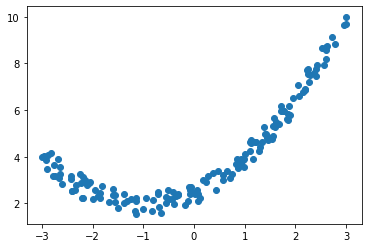

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 160
x = 6 * np.random.rand(n,1) - 3
y = 0.5 * x**2 + x + 2 +np.random.rand(n,1)

plt.scatter(x,y)

#### LinearRegression 실습 01

LinearRegression()

    LinearRegression(fit_intercept, normalize, copy_X, n_jobs)
    
- fit_intercept: 모형에 상수항이 있는가 없는가
- normalize: 매개변수 무시 여부
- copy_X: X의 복사 여부
- n_jobs: 반복횟수

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# LinearRegression 모델 코드
X, y = make_wave(60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_, model.intercept_) 

print("훈련세트 점수: {:.2f}".format(model.score(X_train, y_train)))
print("테스트세트 점수: {:.2f}".format(model.score(X_test, y_test)))

[0.39390555] -0.031804343026759746
훈련세트 점수: 0.67
테스트세트 점수: 0.66


#### LinearRegression 실습 2
변수가 1개인 경우

(array([1.80457482]), 3.1277642362148335)

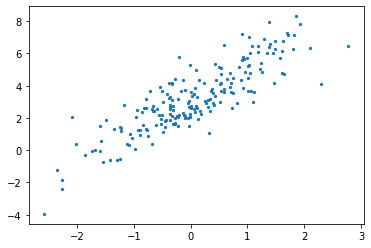

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

n = 200
x = np.random.randn(n)

w = 2
b = 3

y = w*x + b + np.random.randn(n)
plt.scatter(x, y, s=5)

model = LinearRegression()
model.fit(x.reshape(-1,1), y)  #x.reshape()은 배열로 만들어주기 위함?

model.coef_, model.intercept_

LinearRegression 실습 02-2
- 변수가 2개인 경우
- 다변수 선형 회귀 (Multi-variable Linear Regression)

In [28]:
### LinearRegression 실습 02 -1
n = 200
x1 = np.random.randn(n)
x2 = np.random.randn(n)

w1 = 2
w2 = 3
b = 4

#변수가 2개 이상일때는 df로 변환해서 넣어줘야한다
X = pd.DataFrame({'x1':x1, 'x2':x2})

y = x1*w1 + w2*x2 + b + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([2.11719711, 3.00797199]), 3.9583440718798086)